In [1]:
import pandas as pd
from qamsi.utils.data import read_csv

recent = read_csv(".", "cgp_ucb_gmv.csv")
# for i in range(2, 3):
#     ckpt = read_csv(".", f"cgp_ucb_{i}.csv")
#     recent = pd.concat([recent, ckpt], axis=0)

In [2]:
recent

,cgp_ucb
date,
1982-02-25,0.000000
1982-03-30,0.000000
1982-04-29,0.000000
1982-05-27,0.000000
1982-07-29,0.000000
...,...
2023-06-29,0.000017
2023-08-30,0.000000
2023-09-28,0.255270


In [3]:
targets = read_csv("../2_DNK/", "targets.csv", "end_date")
targets

,start_date,vol,naive_vol,shrinkage
end_date,,,,
1981-01-29,1980-12-31,0.006478,0.006508,0.167364
1981-01-30,1981-01-02,0.006500,0.006614,0.382393
1981-02-02,1981-01-05,0.005181,0.005253,0.197455
1981-02-03,1981-01-06,0.004921,0.004940,0.145795
1981-02-04,1981-01-07,0.004314,0.004395,0.210126
...,...,...,...,...
2023-12-12,2023-11-13,0.004721,0.004726,0.122149
2023-12-13,2023-11-14,0.004817,0.005012,0.410885
2023-12-14,2023-11-15,0.005649,0.005740,0.313682


In [4]:
p = recent.merge(targets["shrinkage"], left_index=True, right_index=True).loc["2000-01-01":]

In [5]:
p

,cgp_ucb,shrinkage
2000-02-28,0.144331,0.000000e+00
2000-03-30,0.000000,0.000000e+00
2000-04-27,0.000000,0.000000e+00
2000-05-30,0.000012,0.000000e+00
2000-06-29,0.063940,6.586838e-18
...,...,...
2023-06-29,0.000017,1.454317e-01
2023-08-30,0.000000,7.504403e-02
2023-09-28,0.255270,1.490248e-01
2023-10-30,0.000000,0.000000e+00


In [6]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(p["shrinkage"], p["cgp_ucb"])

0.18819857019427874

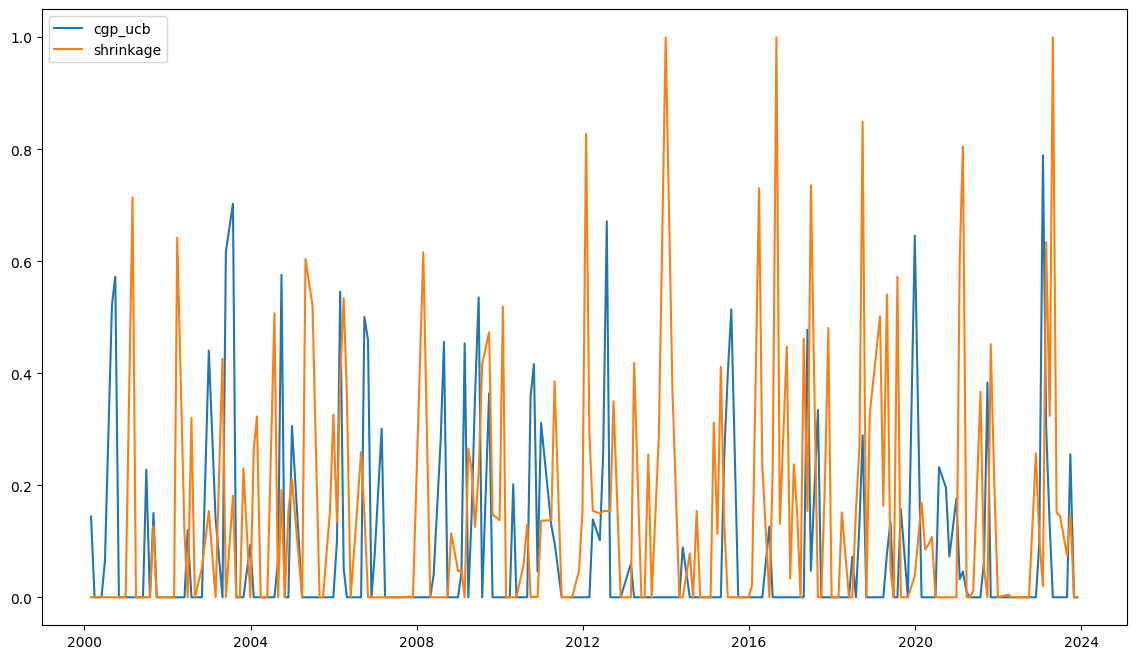

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(p.index, p["cgp_ucb"], label="cgp_ucb")
plt.plot(p.index, p["shrinkage"], label="shrinkage")
plt.legend()
plt.show()

In [8]:
data_df = read_csv("../../data/output/", "dnk_spx_data.csv")

In [9]:
data_df.shape

(10813, 1477)

In [10]:
data_df = data_df.merge(recent, how="left", left_index=True, right_index=True)
data_df.shape

(10813, 1478)

In [11]:
data_df.to_csv("../../data/output/spx_data.csv")